<a href="https://colab.research.google.com/github/NeonLabs146/Neural-network/blob/main/Wiener_Filter.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

The Wiener filter involves understanding of both its mathematical foundation and how it operates in the spatial or frequency domain.

##🧠 **Mathematical Intuition of Wiener Filter**

The Wiener filter is a statistical filter used to reduce noise and blur in an image or signal. It works by minimizing the mean square error (MSE) between the estimated and true signals.

# 🧠 Wiener Filter - Mathematical Formulation

## 1. Image Degradation Model

The observed degraded image is modeled as:

$$
g(x, y) = h(x, y) * f(x, y) + \eta(x, y)
$$

Where:
- \( g(x, y) \): degraded image  
- \( h(x, y) \): point spread function (PSF)  
- \( f(x, y) \): original true image  
- \( \eta(x, y) \): additive noise  
- \( * \): convolution operation

---

## 2. Frequency Domain Representation

Applying the Fourier Transform:

$$
G(u, v) = H(u, v)F(u, v) + N(u, v)
$$

---

## 3. Wiener Filter (General Form)

The Wiener filter estimate in the frequency domain:

$$
\hat{F}(u, v) = \frac{H^*(u, v)}{|H(u, v)|^2 + \frac{S_{\eta}(u, v)}{S_f(u, v)}} \cdot G(u, v)
$$

Where:
- \( H^*(u, v) \): complex conjugate of \( H(u, v) \)  
- \( |H(u, v)|^2 = H(u, v) \cdot H^*(u, v) \): power of PSF  
- \( S_\eta(u, v) \): power spectral density (PSD) of noise  
- \( S_f(u, v) \): PSD of original signal

---

## 4. Simplified Wiener Filter (Assuming Constant \( K \))

If we assume:

$$
\frac{S_\eta(u, v)}{S_f(u, v)} = K
$$

Then the filter simplifies to:

$$
\hat{F}(u, v) = \frac{H^*(u, v)}{|H(u, v)|^2 + K} \cdot G(u, v)
$$

---

## 5. Reconstructing the Image

Apply the inverse Fourier transform:

$$
\hat{f}(x, y) = \mathcal{F}^{-1} \left\{ \hat{F}(u, v) \right\}
$$



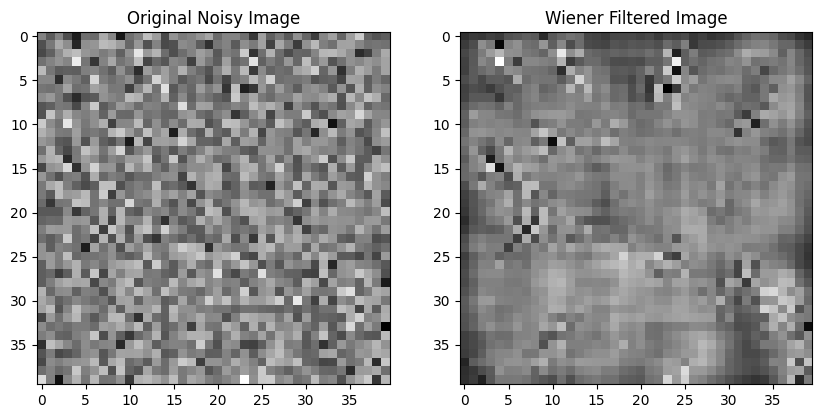

In [ ]:
from scipy.signal import wiener
import numpy as np
import matplotlib.pyplot as plt

# Create a sample noisy image
img = np.random.rand(40, 40) + 0.5 * np.random.randn(40, 40)

# Apply Wiener filter
# mysize: size of the Wiener filter window (e.g., (5, 5) for a 5x5 window)
# noise: noise-power to use. If None, it's estimated as the average of local variance.
filtered_img = wiener(img, mysize=(5, 5))

# Display results (optional)
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.title("Original Noisy Image")
plt.imshow(img, cmap='gray')
plt.subplot(1, 2, 2)
plt.title("Wiener Filtered Image")
plt.imshow(filtered_img, cmap='gray')
plt.show()


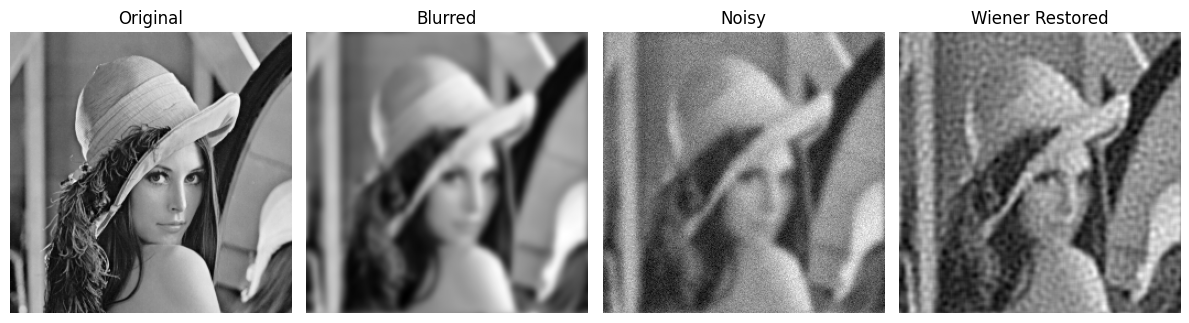

In [ ]:
#implementation from scratch
import numpy as np
import cv2
import matplotlib.pyplot as plt
from scipy.signal import convolve2d
from numpy.fft import fft2, ifft2, fftshift

# Create a sample image (or load one)
img = cv2.imread(cv2.samples.findFile("Lenna.png"), cv2.IMREAD_GRAYSCALE)
img = cv2.resize(img, (256, 256))

# Step 1: Define a Gaussian blur kernel (PSF)
def gaussian_kernel(size, sigma):
    ax = np.arange(-size//2 + 1., size//2 + 1.)
    xx, yy = np.meshgrid(ax, ax)
    kernel = np.exp(-(xx**2 + yy**2) / (2. * sigma**2))
    return kernel / np.sum(kernel)

psf = gaussian_kernel(15, 3)

# Step 2: Blur the image and add Gaussian noise
blurred = convolve2d(img, psf, mode='same', boundary='wrap')
noisy = blurred + np.random.normal(0, 10, img.shape)

# Step 3: Implement Wiener Filter in Frequency Domain
def wiener_filter(g, H, K):
    G = fft2(g)
    H_conj = np.conj(H)
    H_abs2 = np.abs(H) ** 2
    F_hat = (H_conj / (H_abs2 + K)) * G
    return np.abs(ifft2(F_hat))

# Pad PSF to match image size and shift
def psf2otf(psf, shape):
    pad_psf = np.zeros(shape)
    psf_shape = psf.shape
    pad_psf[:psf_shape[0], :psf_shape[1]] = psf
    pad_psf = np.roll(pad_psf, -psf_shape[0]//2, axis=0)
    pad_psf = np.roll(pad_psf, -psf_shape[1]//2, axis=1)
    return fft2(pad_psf)

H = psf2otf(psf, img.shape)
restored = wiener_filter(noisy, H, K=0.01)

# Step 4: Visualize
plt.figure(figsize=(12, 6))
plt.subplot(1, 4, 1)
plt.title('Original')
plt.imshow(img, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.title('Blurred')
plt.imshow(blurred, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.title('Noisy')
plt.imshow(noisy, cmap='gray')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.title('Wiener Restored')
plt.imshow(restored, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


**Correlation**

In [ ]:
import pandas as pd
housing = pd.read_csv('/content/sample_data/california_housing_test.csv')
rounded_corr_matrix = housing.corr().round(2)
print(rounded_corr_matrix['median_income'])

longitude            -0.02
latitude             -0.07
housing_median_age   -0.14
total_rooms           0.22
total_bedrooms        0.02
population            0.03
households            0.05
median_income         1.00
median_house_value    0.67
Name: median_income, dtype: float64


Text(0.5, 1.0, 'Correlation Heatmap')

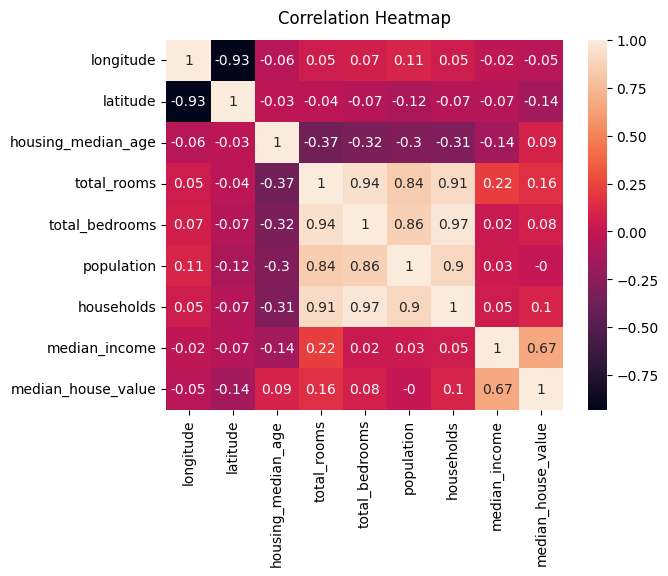

In [ ]:
import seaborn as sns
heatmap = sns.heatmap(rounded_corr_matrix, annot=True)
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':12}, pad=12)

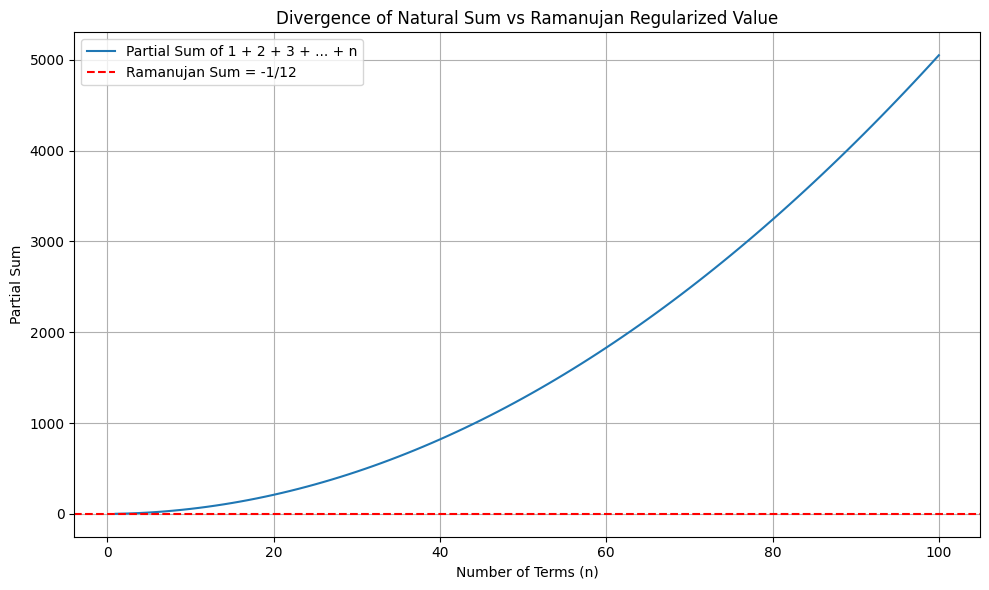

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Number of terms
N = 100

# Generate terms
n = np.arange(1, N+1)
partial_sums = np.cumsum(n)

# Ramanujan regularized value
ramanujan_sum = -1/12

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(n, partial_sums, label='Partial Sum of 1 + 2 + 3 + ... + n')
plt.axhline(y=ramanujan_sum, color='red', linestyle='--', label='Ramanujan Sum = -1/12')
plt.xlabel('Number of Terms (n)')
plt.ylabel('Partial Sum')
plt.title('Divergence of Natural Sum vs Ramanujan Regularized Value')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
